# Calculate network routes between origins and destinations

In [1]:
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import pandas as pd

## Load network and ODs

In [2]:
# load the origin-destination node pairs
od = pd.read_csv('data/od.csv')
len(od)

10219

In [3]:
%%time
# load the bay area's full, drivable, strongly-connected street network graph
G = ox.load_graphml('bayarea_tertiary_strongly_simplified.graphml', folder='data/network')

Wall time: 8.06 s


In [4]:
nx.is_strongly_connected(G)

True

## Calculate routes between origins and destinations

#### First, look at topological graph distance (number of edges traversed)

In [5]:
%%time
# calculate shortest path topological distance (edges) between rows' origin and destination nodes
def network_distance(row):
    return nx.shortest_path_length(G, source=row['orig'], target=row['dest'])

od['network_distance_e'] = od.apply(network_distance, axis=1)

Wall time: 25.8 s


In [6]:
od['network_distance_e'].describe()

count    10219.000000
mean        32.113710
std         22.883246
min          0.000000
25%         15.000000
50%         27.000000
75%         45.000000
max        157.000000
Name: network_distance_e, dtype: float64

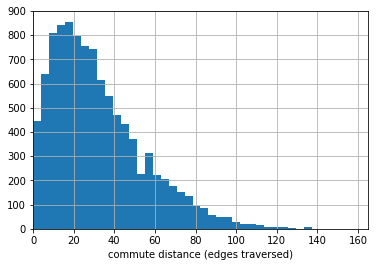

In [7]:
ax = (od['network_distance_e']).hist(bins=40)
ax.set_xlim(left=0)
ax.set_xlabel('commute distance (edges traversed)')
plt.show()

#### Second, look at metric distance (meters traveled)

In [8]:
%%time
# calculate shortest path metric distance (meters) between rows' origin and destination nodes
def network_distance(row):
    return nx.shortest_path_length(G, source=row['orig'], target=row['dest'], weight='length')

od['network_distance_m'] = od.apply(network_distance, axis=1)

Wall time: 2min 56s


In [9]:
od['network_distance_m'].describe()

count     10219.000000
mean      19865.439741
std       19347.145672
min           0.000000
25%        5700.172000
50%       13590.871000
75%       27918.462500
max      165177.252000
Name: network_distance_m, dtype: float64

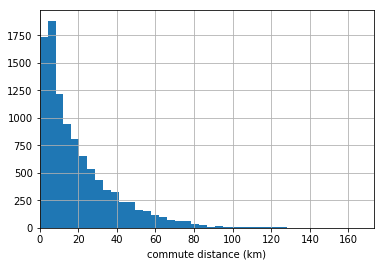

In [10]:
ax = (od['network_distance_m']/1e3).hist(bins=40)
ax.set_xlim(left=0)
ax.set_xlabel('commute distance (km)')
plt.show()

## Save to disk

In [11]:
# save to disk
od.to_csv('data/od_distances.csv', index=False, encoding='utf-8')
od.head()

,SAMPN,PERNO,orig,dest,network_distance_e,network_distance_m
0,1033944,1,65358739,2304626340,29,10873.674
1,1035274,2,65640129,295121038,57,43172.919
2,1041304,1,65432018,65500241,9,4286.565
3,1041494,4,57790701,57889082,31,18564.260
4,1041766,1,65379557,65368988,47,21455.826
